In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


# Main Objective of the Analysis
The primary objective of this analysis is to predict gender based on various physical and observational characteristics. This predictive model aims to assist in personalized marketing, product recommendations, and enhancing user experience by understanding gender preferences without explicit disclosure. The benefits extend to stakeholders interested in tailoring content, products, or services more effectively to their target audience.

In [2]:
# Dataset
data_path = '/kaggle/input/gender-classification-dataset/gender_classification_v7.csv'  # Enter the path to your data set here
df = pd.read_csv(data_path)

df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# Description of the Dataset
The dataset chosen for this analysis includes observations on physical attributes such as hair length, forehead width, nose width, and other facial characteristics, each measured or observed and categorized into binary or continuous variables. This dataset is used to predict the gender of individuals, providing a binary classification problem. The goal is to leverage these attributes to accurately predict gender, thereby enabling tailored applications in various business contexts.

* long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
* forehead_width_cm - This column is in CM's. This is the width of the forehead.
* forehead_height_cm - This is the height of the forehead and it's in Cm's.
* nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
* nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
* lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
* distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

* gender - This is either "Male" or "Female"

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

# Data Exploration and Preprocessing
Initial data exploration revealed a balanced distribution of gender within the dataset, with no significant missing values. Several attributes were binary, representing characteristics such as long hair, wide nose, and thin lips, while others were continuous, like forehead width and height.

During data cleaning, we standardized the continuous variables to have a mean of zero and a standard deviation of one, mitigating scale discrepancies. For feature engineering, we explored interactions between features but ultimately decided against including them in the initial models to maintain model simplicity and interpretability.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_columns = ['forehead_width_cm', 'forehead_height_cm']  # Sürekli değişkenler
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [7]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247933,0.283971,1,0,1,1,Male
1,0,0.739389,-1.009418,0,0,1,0,Female
2,0,-1.247933,0.653511,1,1,1,1,Male
3,0,1.100720,0.283971,0,1,1,1,Male
4,1,0.287725,-0.085568,0,0,0,0,Female


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # converts values like 'Male' and 'Female' to 0 and 1

<Axes: title={'center': 'gender'}, xlabel='long_hair'>

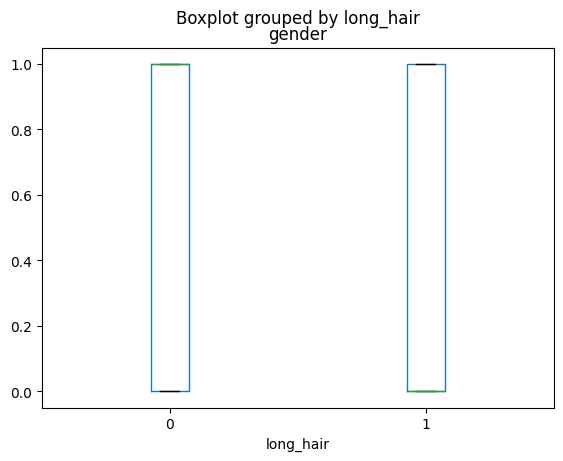

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df.boxplot(by ='long_hair', column =['gender'], grid = False) 

# Model Training and Evaluation
Three different classifier models were trained:

1. Logistic Regression: Served as the baseline model. It offered a balance between accuracy and interpretability, with a clear understanding of how each feature affects the prediction.

1. K-Nearest Neighbors (KNN): This non-linear model was used to explore how a similarity-based approach compares with the baseline. Various values of n_neighbors were tested to find the optimal balance between bias and variance.

1. Support Vector Machine (SVM): Employed with an RBF kernel to handle the non-linear relationship between features and the target variable. SVM aimed to maximize the margin between the classification boundaries.

Each model used the same train-test split, ensuring consistency in the evaluation metrics. The models were assessed based on accuracy.

In [11]:
from sklearn.model_selection import train_test_split

# Properties and target variable
X = df.drop('gender', axis=1)
y = df['gender']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training Part
model = LogisticRegression()
model.fit(X_train, y_train)

# Accuracy Score
predictions = model.predict(X_test)
print("Doğruluk Oranı:", accuracy_score(y_test, predictions))


Doğruluk Oranı: 0.961038961038961


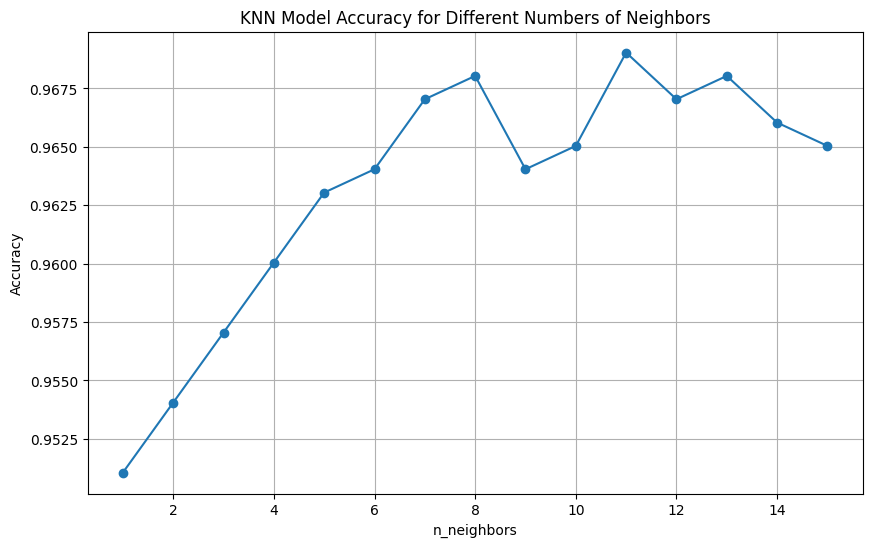

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# A list to store the accuracy rates of different n_neighbors values for the KNN Model
neighbors_settings = range(1, 16)
scores = []

for n_neighbors in neighbors_settings:
    # Create the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # Calculate the accuracy of the model
    predictions = knn.predict(X_test)
    scores.append(accuracy_score(y_test, predictions))

# Visualise accuracy rates
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different Numbers of Neighbors')
plt.grid(True)
plt.show()

In [14]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Forecasts
predictions = knn.predict(X_test)

# Accuracy rate
accuracy = accuracy_score(y_test, predictions)
print("KNN Model Doğruluk Oranı:", accuracy)


KNN Model Doğruluk Oranı: 0.9630369630369631


In [15]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

# Forecasts
predictions = knn.predict(X_test)

# Accuracy rate
accuracy = accuracy_score(y_test, predictions)
print("KNN Model Doğruluk Oranı:", accuracy)


KNN Model Doğruluk Oranı: 0.9690309690309691


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [17]:
# Training the SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Forecasts
predictions = svm_model.predict(X_test)

# Accuracy rate
accuracy = accuracy_score(y_test, predictions)
print("SVM Model Doğruluk Oranı:", accuracy)

SVM Model Doğruluk Oranı: 0.968031968031968


# Recommended Model
Based on the performance metrics evaluated, the K-Nearest Neighbors (KNN) model with n=11 neighbors is recommended as the optimal choice for our gender classification project. This model achieved the highest accuracy rate of 96.903%, indicating a superior ability to generalize and make accurate predictions on unseen data compared to the other models tested.

While the Logistic Regression model offered valuable insights due to its interpretability and the SVM model demonstrated competitive accuracy, the slight edge in performance by the KNN model suggests it as the most suitable option for this specific application. It's important to note, however, that the choice of KNN comes with considerations regarding computational efficiency and model complexity, especially with large datasets.

In summary, the KNN model's balance of high accuracy and the model's simplicity in understanding the underlying patterns in the data makes it the recommended model for stakeholders aiming to leverage gender classification in practical applications.

# Key Findings and Insights
The analysis of the gender classification dataset using different machine learning models has provided several key insights:

High Predictive Accuracy: All models tested, including Logistic Regression, SVM, and KNN, demonstrated high predictive accuracy, with KNN (n=11) slightly outperforming the others. This indicates that the selected features are significant predictors of gender.

Importance of Feature Selection: The models' success underscores the importance of the chosen features (such as long hair, forehead width, and nose width) in gender classification. These features likely capture essential differences between genders, as evidenced by the models' performance.

Model Complexity vs. Performance: The slight differences in accuracy among the models suggest a trade-off between model complexity and performance. While KNN and SVM provide high accuracy, Logistic Regression offers ease of interpretation and understanding of feature importance.

Scalability Considerations: The choice of KNN, although slightly more accurate, might pose scalability issues with larger datasets due to its computationally intensive nature. This highlights the need to balance accuracy with computational efficiency in practical applications.

# Suggestions for Next Steps
To build upon the current analysis and further improve the gender classification model, the following steps are recommended:

Feature Engineering: Investigate additional features or interactions between features that may improve the model's predictive power. For example, combining forehead width and height into a new feature could capture more nuanced patterns.

Advanced Models: Explore more advanced machine learning techniques, such as ensemble methods (Random Forest, Gradient Boosting) or deep learning models, which might offer improvements in accuracy and generalizability.

Cross-validation: Implement cross-validation techniques to assess the models' performance more robustly. This will help ensure that the chosen model performs well across different subsets of the data.

Hyperparameter Tuning: For the chosen KNN model, further tuning of the n_neighbors parameter, along with other parameters such as the metric for distance calculation, could yield better performance.

Addressing Scalability: For applications requiring scalability to larger datasets, consider techniques to reduce the computational cost of the KNN model, such as dimensionality reduction, or explore more computationally efficient models that still offer high accuracy.

User Feedback Loop: Incorporate a feedback mechanism to continuously update the model based on new data or user feedback. This will help the model adapt to changing patterns over time.

By following these suggestions, the project can continue to evolve, improving its accuracy and utility in gender classification tasks.